In [1]:
# Load dependencies
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import IPython.display as ipd

In [2]:
# Create file paths to audio
scale_path = os.path.join("audio", "scale.wav")
debussy_path = os.path.join("audio", "debussy.wav")
redhot_path = os.path.join("audio", "redhot.wav")
duke_path = os.path.join("audio", "duke.wav")

In [3]:
# Load audio into librosa
scale, sr = librosa.load(scale_path)
debussy, _ = librosa.load(debussy_path)
redhot, _ = librosa.load(redhot_path)
duke, _ = librosa.load(duke_path)

In [4]:
# Define constants
FRAME_SIZE = 2048
HOP_SIZE = 512

# Use librosa to perform Short-Time Fourier Transform (STFT)
scale_stft = librosa.stft(
    y=scale, 
    n_fft=FRAME_SIZE, 
    hop_length=HOP_SIZE
    )
debussy_stft = librosa.stft(
    y=debussy, 
    n_fft=FRAME_SIZE, 
    hop_length=HOP_SIZE
    )
redhot_stft = librosa.stft(
    y=redhot, 
    n_fft=FRAME_SIZE, 
    hop_length=HOP_SIZE
    )
duke_stft = librosa.stft(
    y=duke, 
    n_fft=FRAME_SIZE, 
    hop_length=HOP_SIZE
    )

In [5]:
# As a test, let's get the dimensions of the transformed scale
scale_stft.shape

(1025, 342)

Note that this makes sense since $\frac{2048}{2}+1=1025$ and $\frac{174,943-2,048}{512}+1=342$

In [10]:
# We still get complex numbers
type(scale_stft[0][0])

numpy.complex64

Let's now try creating a spectrogram. First, we have to get the squared magnitudes of the signals

In [11]:
scale_stft = np.square(np.abs(scale_stft))
debussy_stft = np.square(np.abs(debussy_stft))
redhot_stft = np.square(np.abs(redhot_stft))
duke_stft = np.square(np.abs(duke_stft))

In [12]:
from numpy.typing import NDArray

def plot_spectrogram(
        Y: NDArray, 
        sr: int, 
        hop_length: int, 
        y_axis: str="linear"
        ) -> None:
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(
        data=Y,
        sr=sr,
        hop_length=hop_length,
        x_axis="time",
        y_axis=y_axis
    )
    plt.colorbar(format="%+2.f")


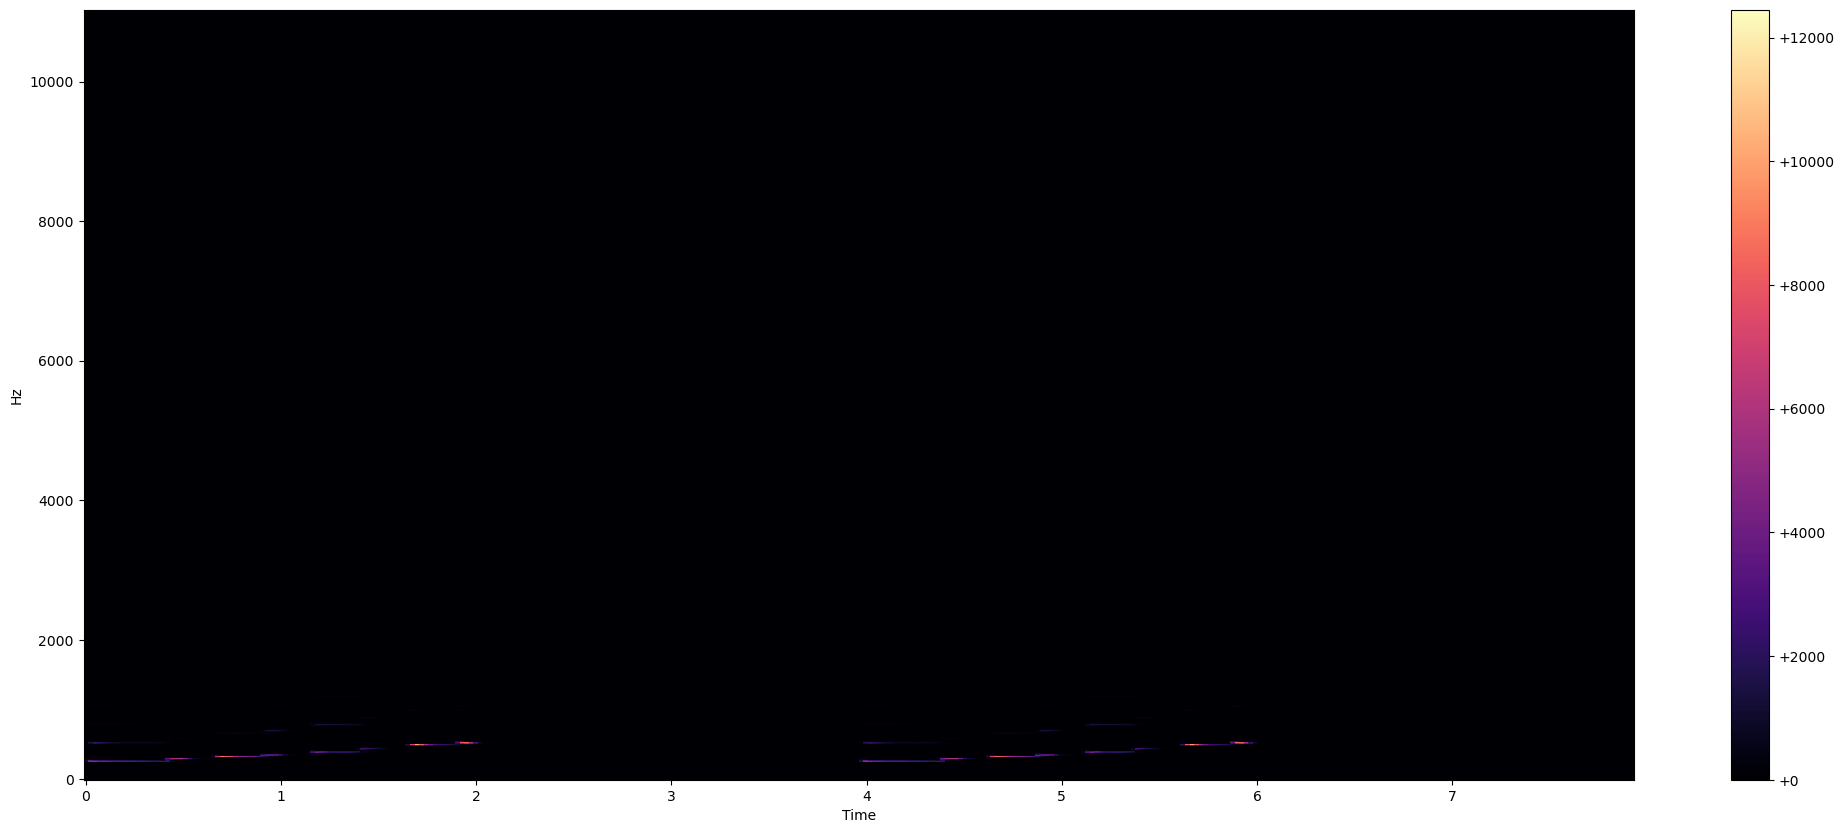

In [13]:
plot_spectrogram(Y=scale_stft, sr=sr, hop_length=HOP_SIZE)

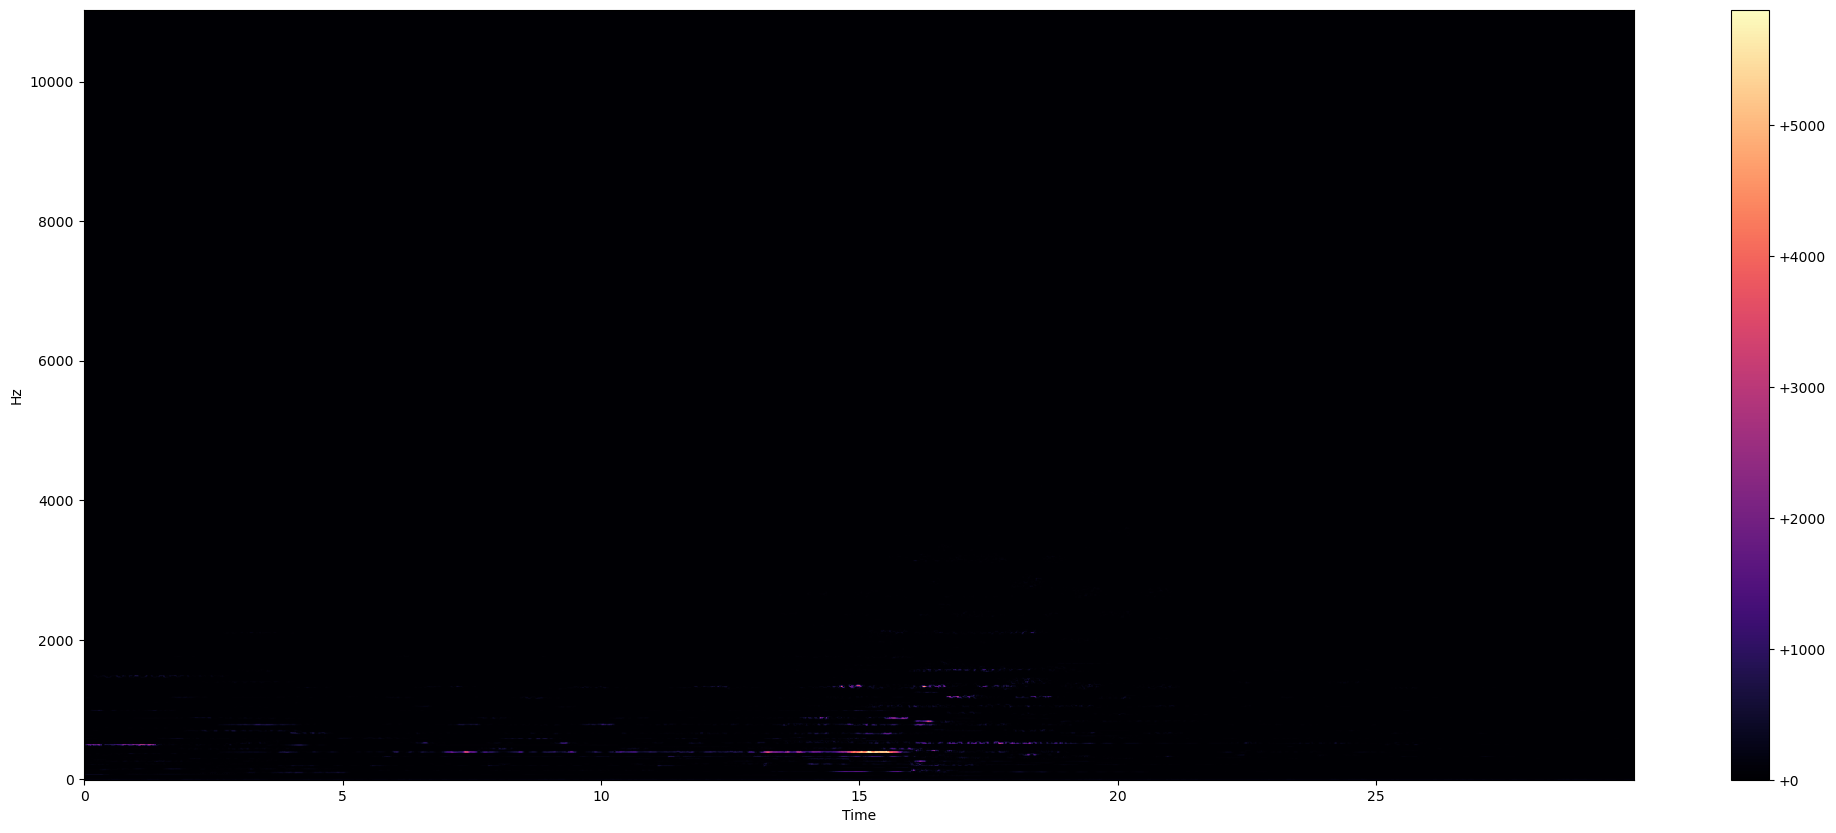

In [14]:
plot_spectrogram(Y=debussy_stft, sr=sr, hop_length=HOP_SIZE)

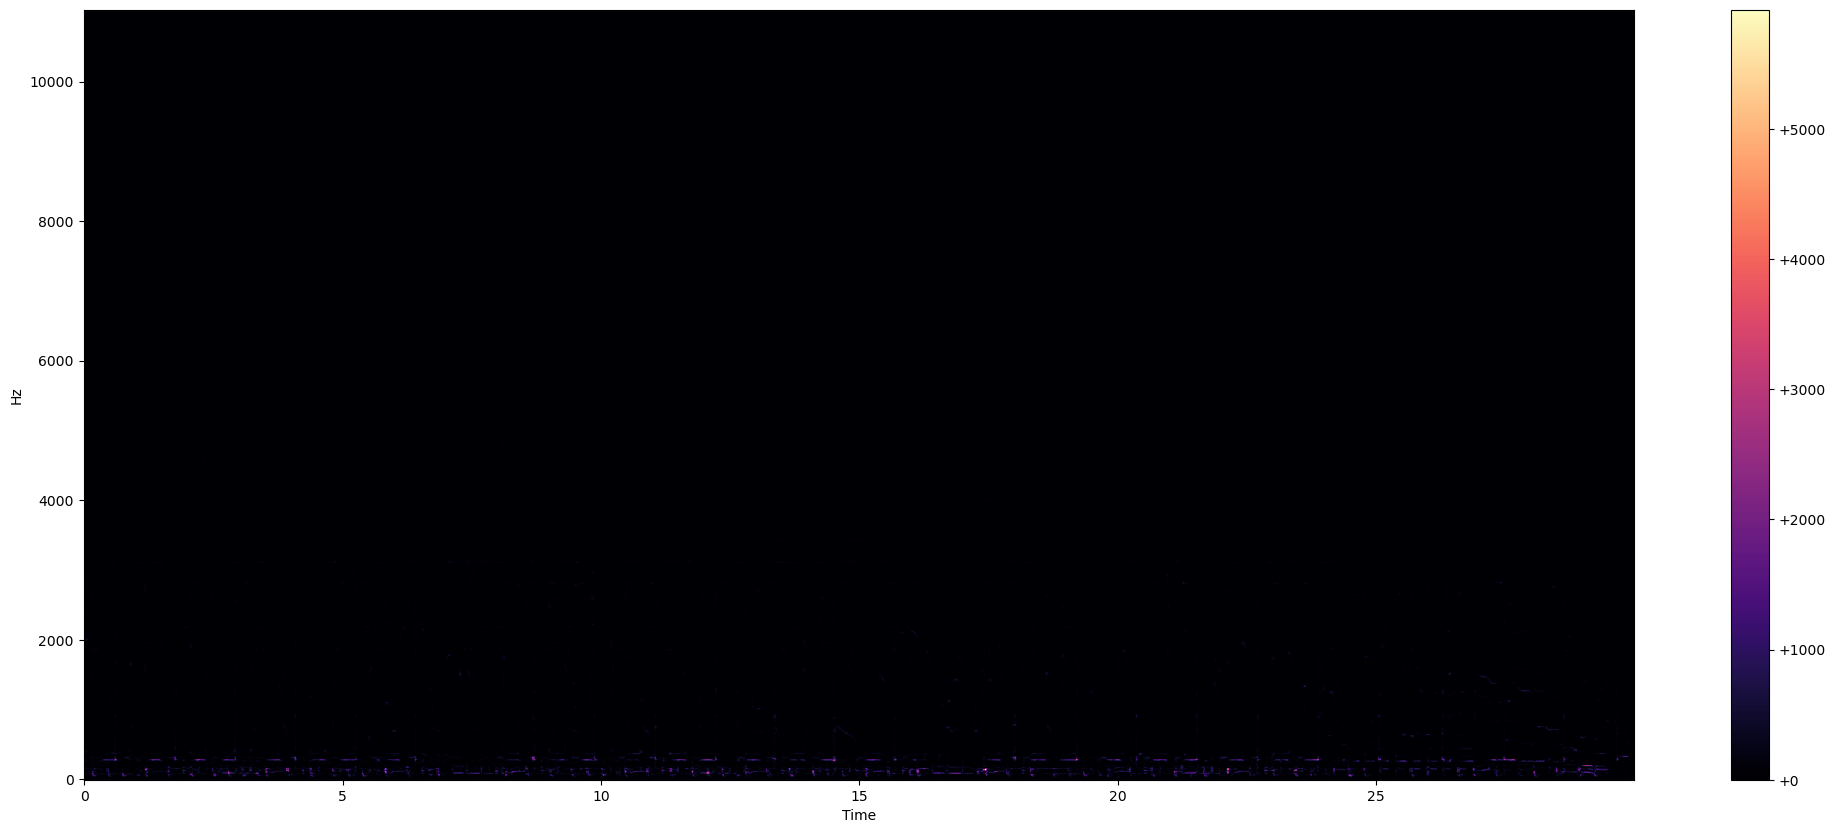

In [17]:
plot_spectrogram(Y=redhot_stft, sr=sr, hop_length=HOP_SIZE)

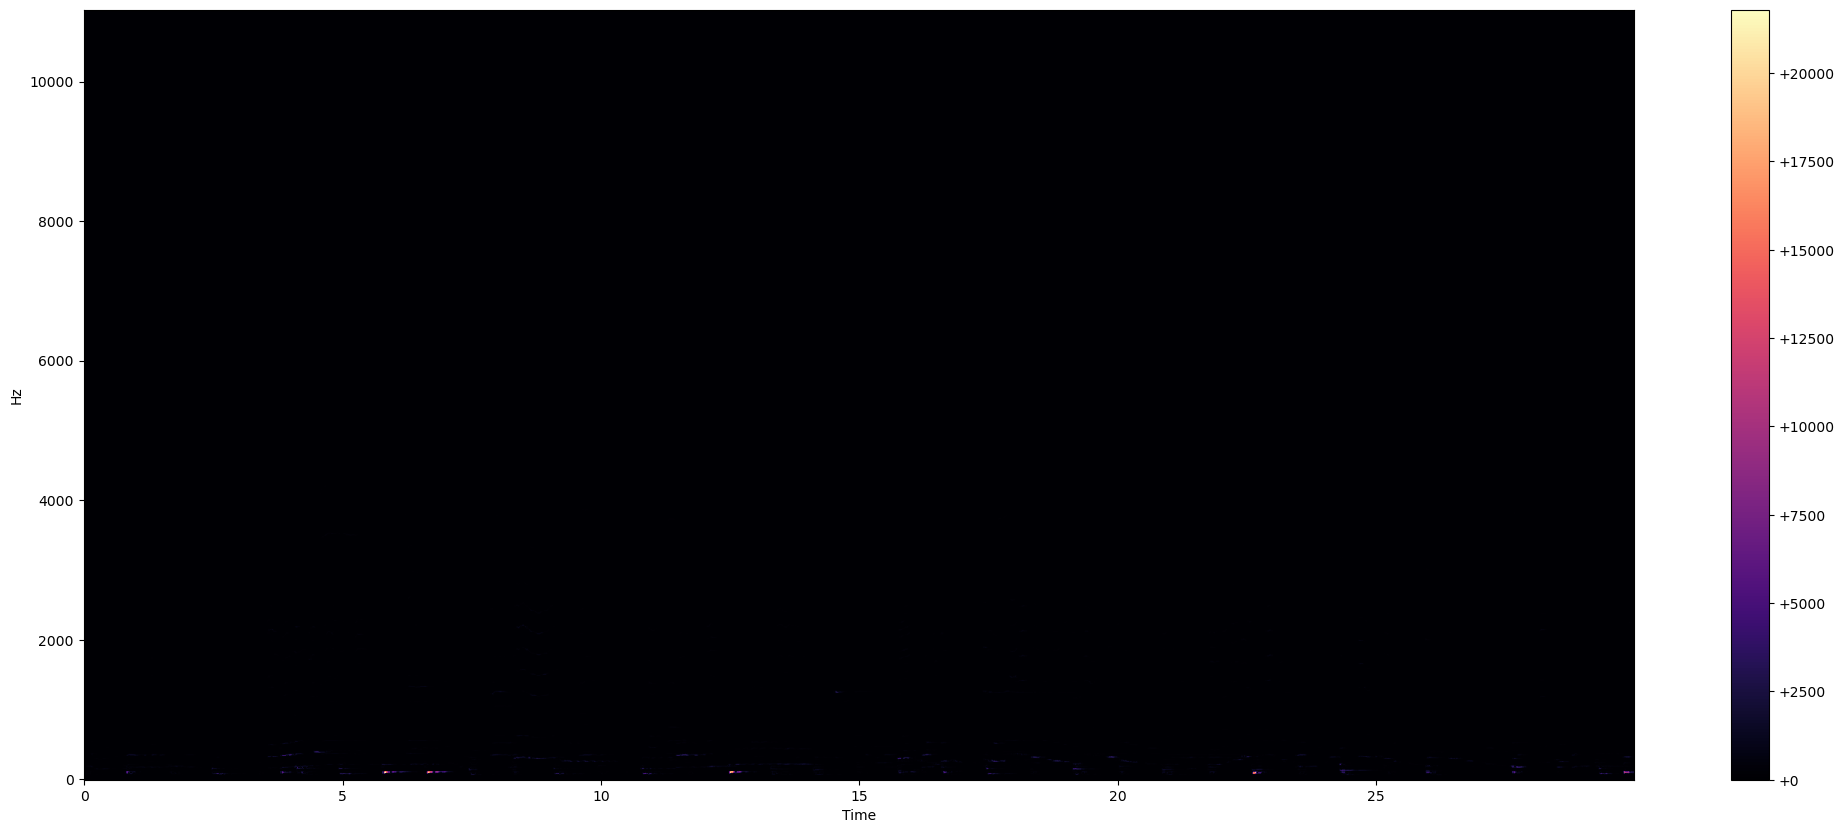

In [18]:
plot_spectrogram(Y=duke_stft, sr=sr, hop_length=HOP_SIZE)

Note that all of our spectrograms are almost completely pitch-black. Why is this? It turns out that this is just how sound works; the magnitudes that are returned by the STFT are all on a linear scale. However, humans hear both sound intensity *and* frequency on a logarithmic scale. The sound intensities produced at each frame and frequency bin are still in watts (power). So, we have to convert this to a logarithmic scale, known as decibles

In [19]:
# Convert sound power to decible scale
scale_stft_log = librosa.power_to_db(scale_stft)
debussy_stft_log = librosa.power_to_db(debussy_stft)
redhot_stft_log = librosa.power_to_db(redhot_stft)
duke_stft_log = librosa.power_to_db(duke_stft)

However, even after converting all of the sound power to decibles, we still get kind of a crunched graph. This is because we also hear frequency on a logarithmic scale; the perceived difference between two notes depends on their ratio, not the absolute difference 

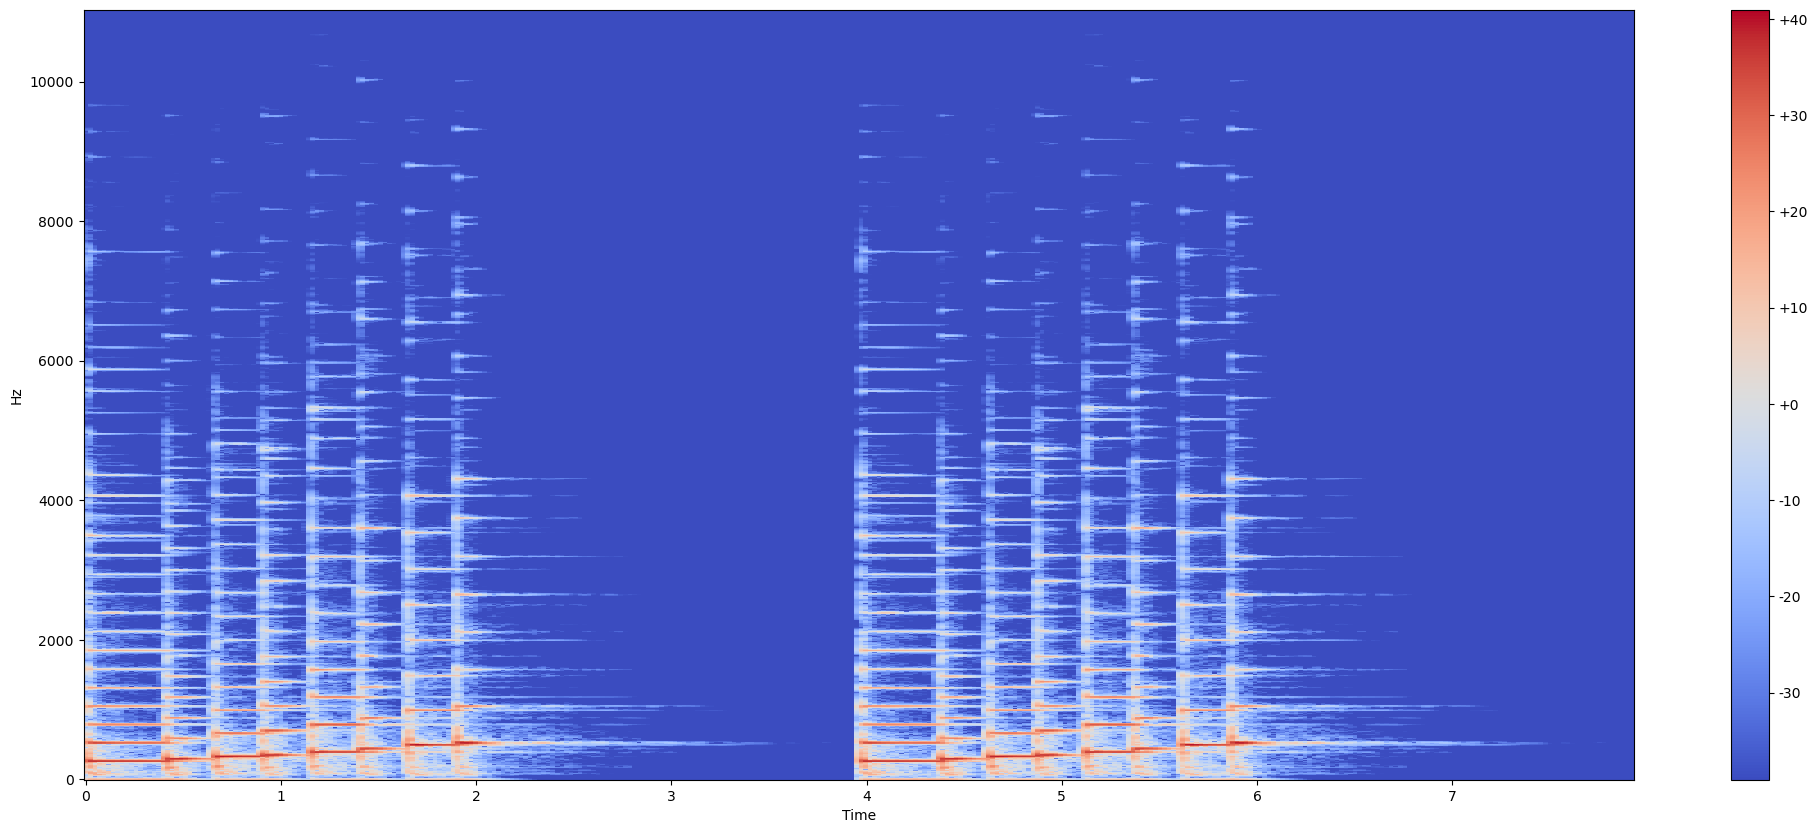

In [20]:
plot_spectrogram(Y=scale_stft_log, sr=sr, hop_length=HOP_SIZE)

So, let's re-plot everything with a logarithmic scale

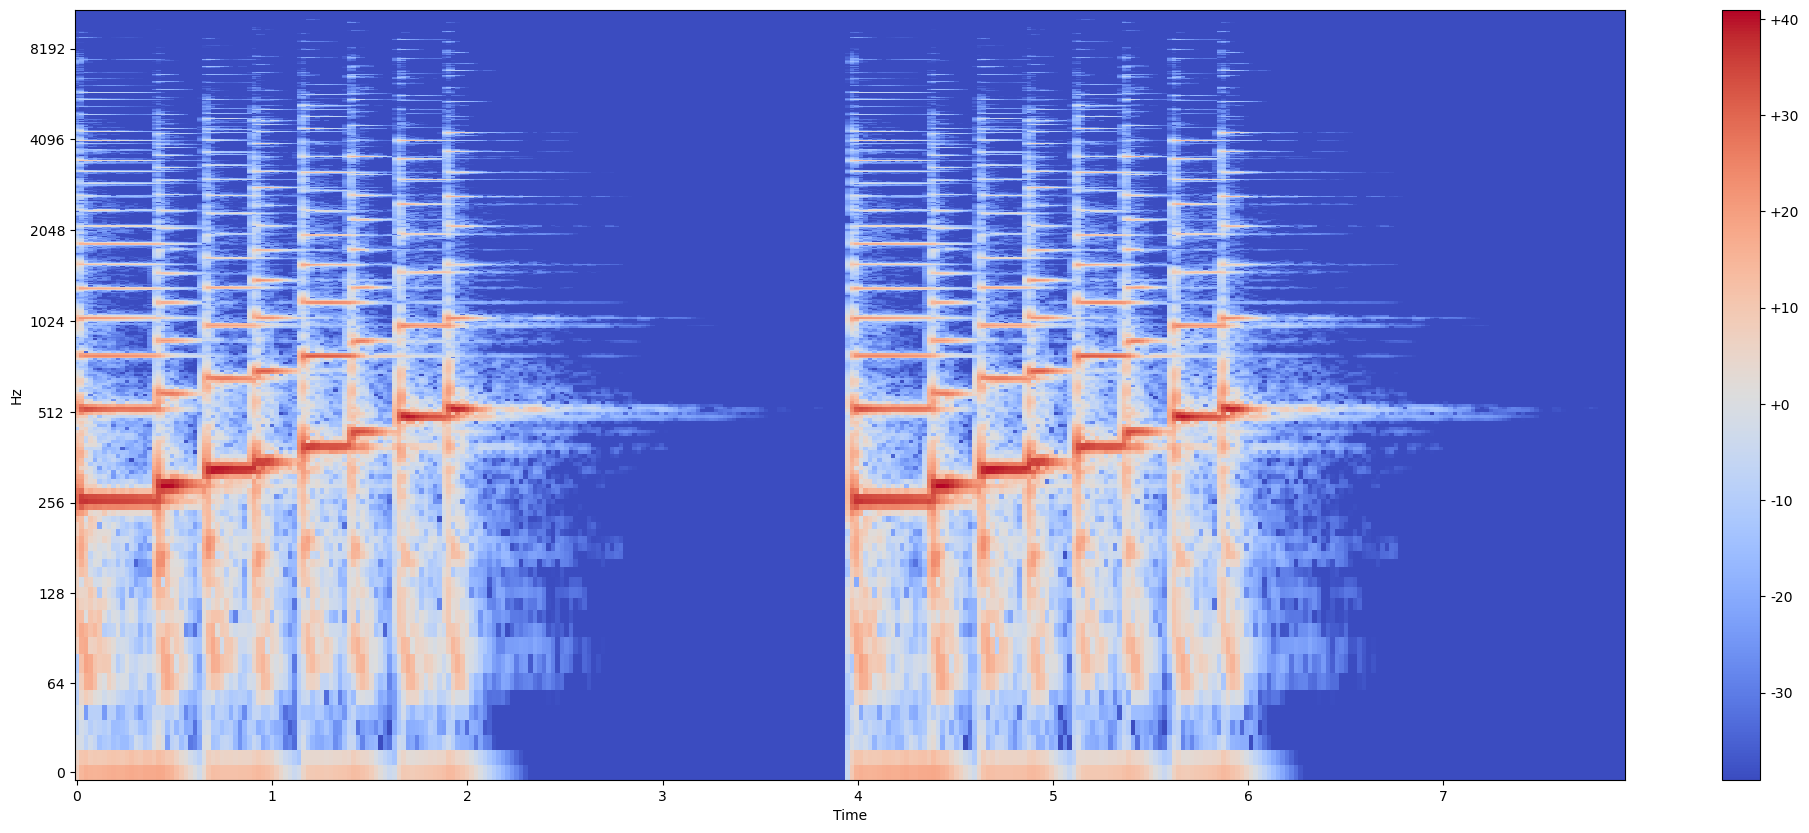

In [21]:
plot_spectrogram(Y=scale_stft_log, sr=sr, hop_length=HOP_SIZE, y_axis="log")

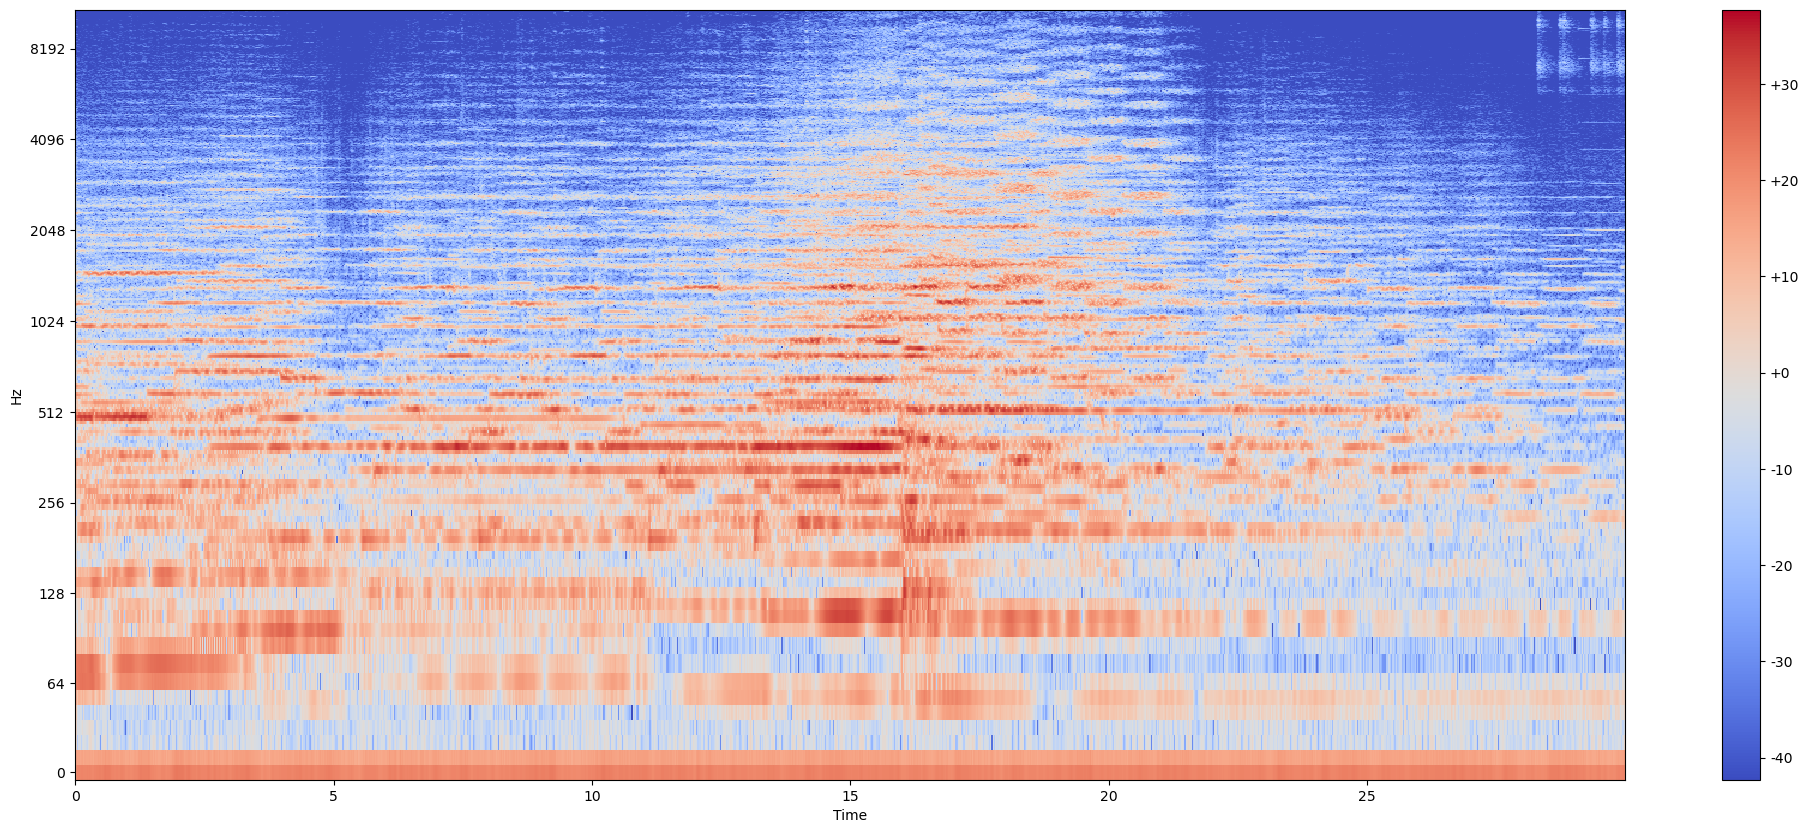

In [22]:
plot_spectrogram(Y=debussy_stft_log, sr=sr, hop_length=HOP_SIZE, y_axis="log")

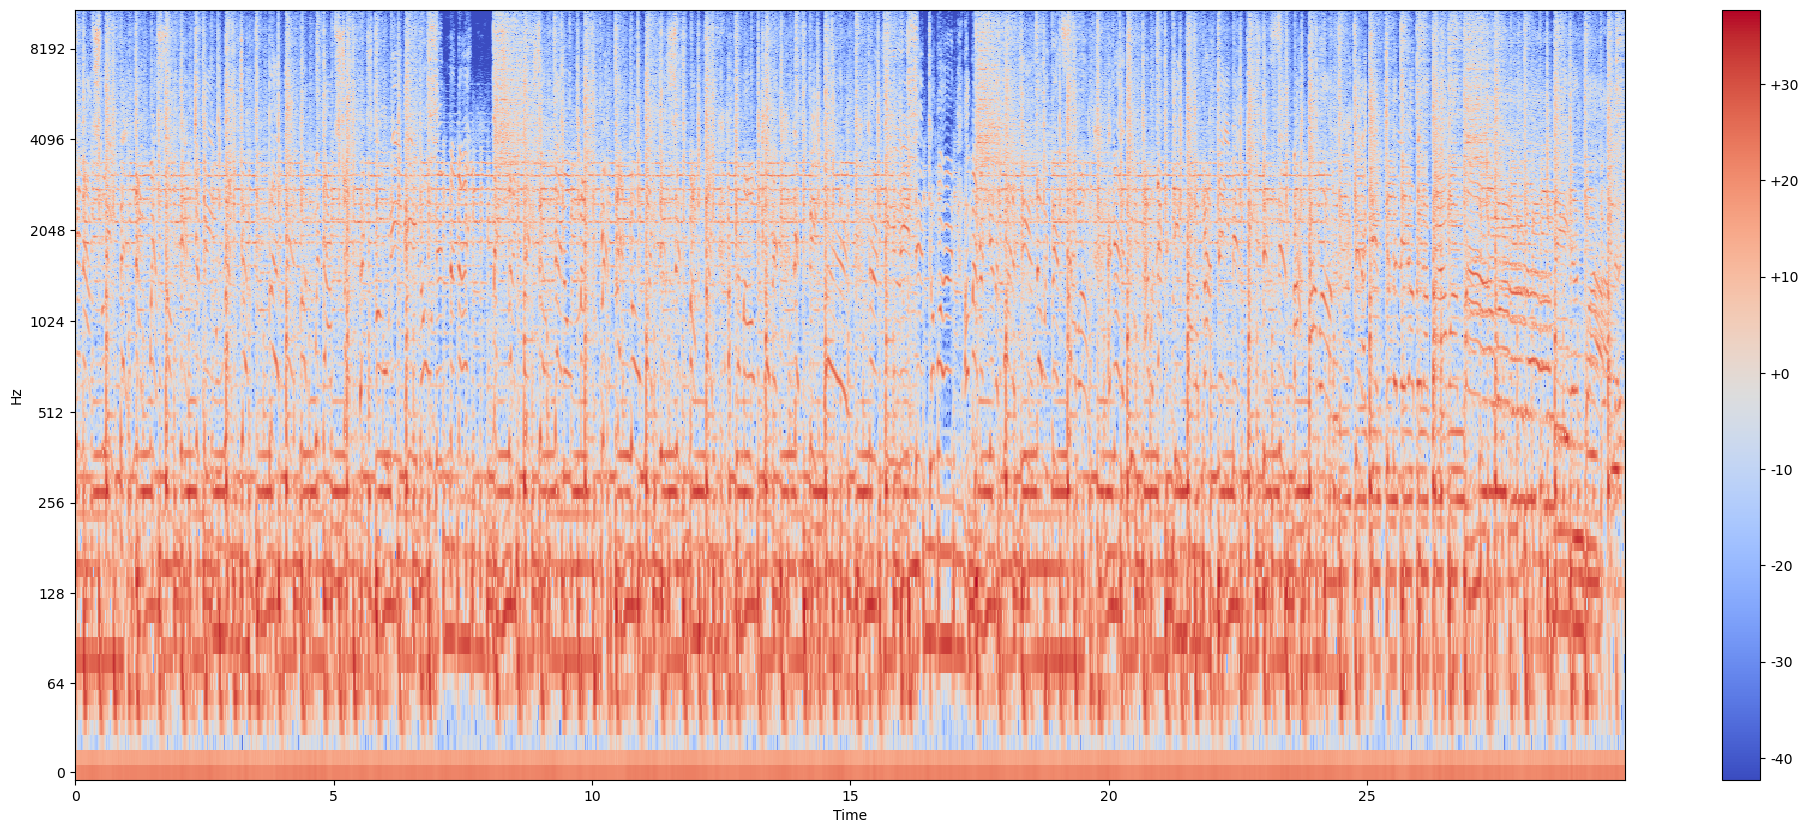

In [23]:
plot_spectrogram(Y=redhot_stft_log, sr=sr, hop_length=HOP_SIZE, y_axis="log")

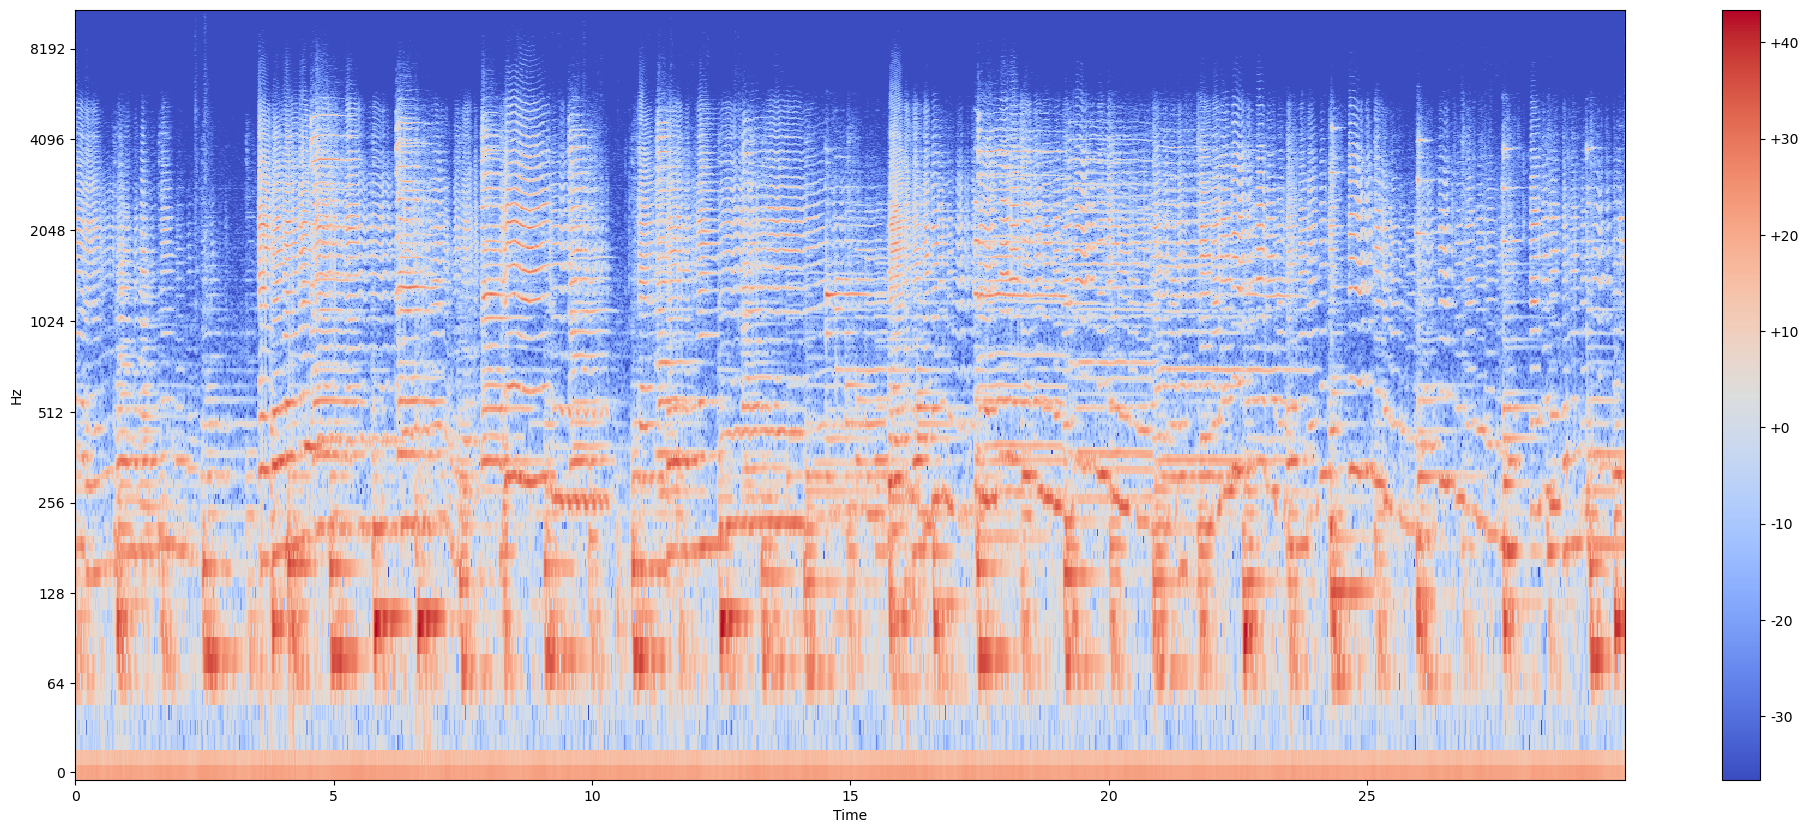

In [24]:
plot_spectrogram(Y=duke_stft_log, sr=sr, hop_length=HOP_SIZE, y_axis="log")